<a href="https://colab.research.google.com/github/MRifdaM/ML_S5_2025/blob/main/Week5/Praktikum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Praktikum 1

In [ ]:
# Instalasi pustaka hdbscan (tidak tersedia default di sklearn)
!pip install hdbscan

# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

In [ ]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

In [ ]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
dbs = DBSCAN(eps=0.3)
for idx, scale in enumerate([1, 0.5, 3]):
    dbs.fit(X * scale)
    plot(X * scale, dbs.labels_, parameters={"scale": scale, "eps": 0.3}, ax=axes[idx])

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(12, 5))
dbs = DBSCAN(eps=0.9).fit(3 * X)
plot(3 * X, dbs.labels_, parameters={"scale": 3, "eps": 0.9}, ax=axis)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
hdb = hdbscan.HDBSCAN()
for idx, scale in enumerate([1, 0.5, 3]):
    hdb.fit(X * scale)
    plot(X * scale, hdb.labels_, hdb.probabilities_, ax=axes[idx], parameters={"scale": scale})

In [ ]:
centers = [[-0.85, -0.85], [-0.85, 0.85], [3, 3], [3, -3]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.2, 0.35, 1.35, 1.35], random_state=0
)
plot(X, labels=labels_true, ground_truth=True)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
params = {"eps": 0.7}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[0])

params = {"eps": 0.3}
dbs = DBSCAN(**params).fit(X)
plot(X, dbs.labels_, parameters=params, ax=axes[1])

In [ ]:
hdb = hdbscan.HDBSCAN().fit(X)
plot(X, hdb.labels_, hdb.probabilities_)

### Praktikum 2

> Langkah 7: Eksperimen Hyperparameter min_cluster_size
>> Ubah nilai min_cluster_size.


In [ ]:
PARAM = ({"min_cluster_size": 5}, {"min_cluster_size": 3}, {"min_cluster_size": 25})
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

> Langkah 8: Eksperimen Hyperparameter min_samples
>> Ubah nilai min_samples.

In [ ]:
PARAM = (
    {"min_cluster_size": 20, "min_samples": 5},
    {"min_cluster_size": 20, "min_samples": 3},
    {"min_cluster_size": 20, "min_samples": 25},
)
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

> Langkah 9: DBSCAN Clustering dari Pohon HDBSCAN
>>Gunakan parameter cut_distance.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


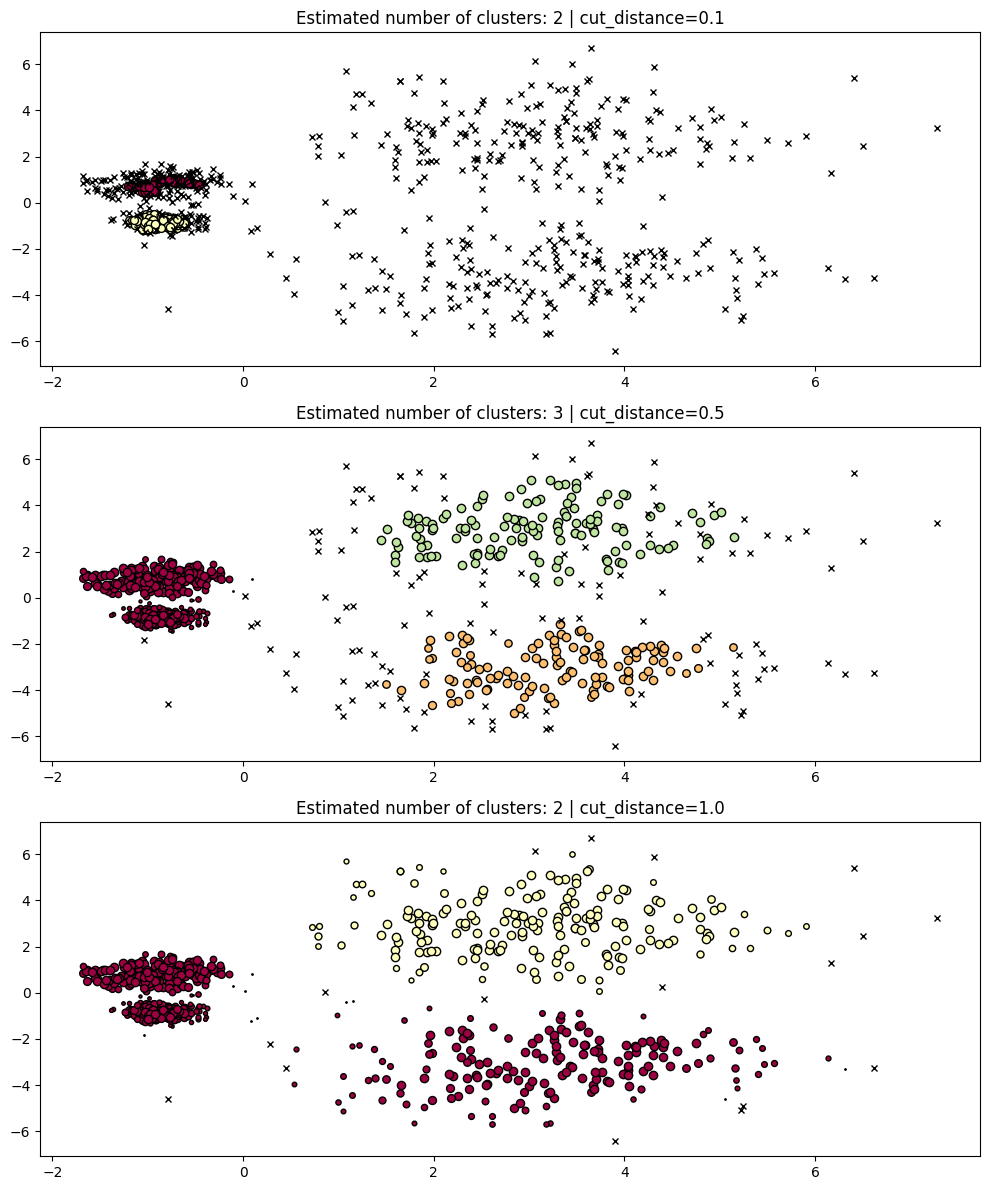

In [ ]:
PARAM = (
    {"cut_distance": 0.1},
    {"cut_distance": 0.5},
    {"cut_distance": 1.0},
)
hdb = hdbscan.HDBSCAN().fit(X)
fig, axes = plt.subplots(len(PARAM), 1, figsize=(10, 12))
for i, param in enumerate(PARAM):
    labels = hdb.dbscan_clustering(**param)
    plot(X, labels, hdb.probabilities_, param, ax=axes[i])

> Langkah 10: Evaluasi dengan Silhouette Score
>>Silhouette Score adalah metrik yang mengukur seberapa baik sebuah data titik di-cluster dalam grupnya sendiri dibandingkan dengan jarak ke grup terdekat lainnya. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa titik data lebih terisolasi dan lebih cocok dengan cluster-nya.

Jalankan kode berikut untuk menghitung Silhouette Score:

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk hasil clustering HDBSCAN
sil_score = silhouette_score(X, hdb.labels_)
print(f"Silhouette Score: {sil_score}")


* Jika nilai Silhouette Score mendekati 1, ini menunjukkan bahwa clustering berhasil memisahkan data dengan baik.

* Nilai negatif menunjukkan bahwa data mungkin salah kelompok atau tidak tercluster dengan baik.



>Langkah 11: Evaluasi dengan Davies-Bouldin Index
>>Davies-Bouldin Index (DBI) adalah metrik yang mengukur kualitas clustering berdasarkan jarak antar cluster dan seberapa besar sebaran dalam masing-masing cluster. Semakin kecil nilai DBI, semakin baik clustering yang dihasilkan. Nilai DBI yang rendah menunjukkan bahwa cluster saling terpisah dengan baik, sementara nilai yang tinggi menunjukkan bahwa cluster mungkin tumpang tindih.

Jalankan kode berikut untuk menghitung Davies-Bouldin Index:

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering HDBSCAN
dbi_score = davies_bouldin_score(X, hdb.labels_)
print(f"Davies-Bouldin Index: {dbi_score}")

Davies-Bouldin Index yang lebih rendah menunjukkan bahwa clustering lebih baik karena cluster lebih terpisah dengan jelas dan homogen.

Nilai yang lebih tinggi menunjukkan bahwa cluster lebih saling tumpang tindih dan kurang terpisah dengan jelas.

> Langkah 12: Visualisasi Hasil Evaluasi
>> Setelah menghitung Silhouette Score dan Davies-Bouldin Index, kita dapat membuat visualisasi untuk mempermudah pemahaman. Anda bisa memplot hasil Silhouette Score dan Davies-Bouldin Index dalam bentuk grafik untuk membandingkan berbagai eksperimen dengan hyperparameter yang berbeda.

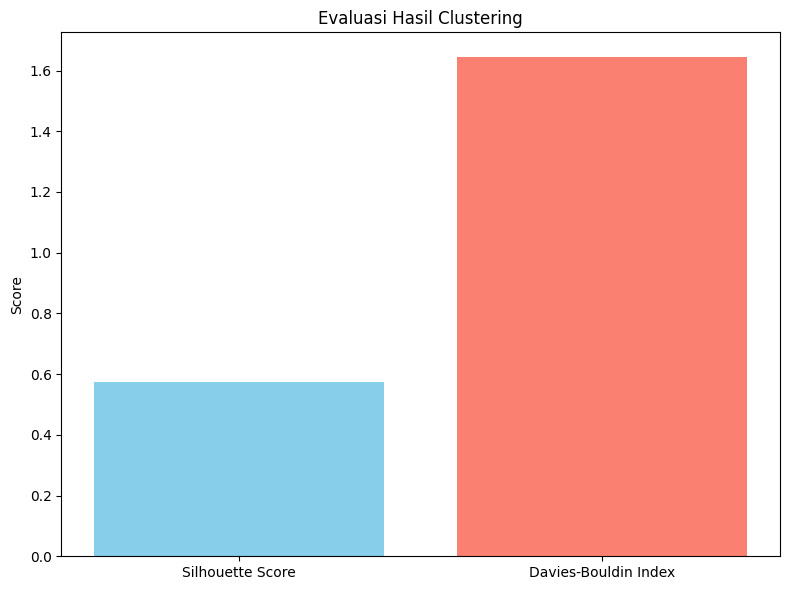

In [ ]:
# Misalnya kita ingin membandingkan DBI dan Silhouette Score untuk beberapa eksperimen
scores = {
    "Silhouette Score": sil_score,
    "Davies-Bouldin Index": dbi_score
}

# Plot hasil evaluasi
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
ax.set_title("Evaluasi Hasil Clustering")
ax.set_ylabel("Score")
plt.tight_layout()
plt.show()

### Tugas

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster (tanpa noise): 2
Banyaknya noise: 2
Adjusted Rand Index (non-noise): 0.5484194032210918
Normalized Mutual Info (non-noise): 0.6943931497397514


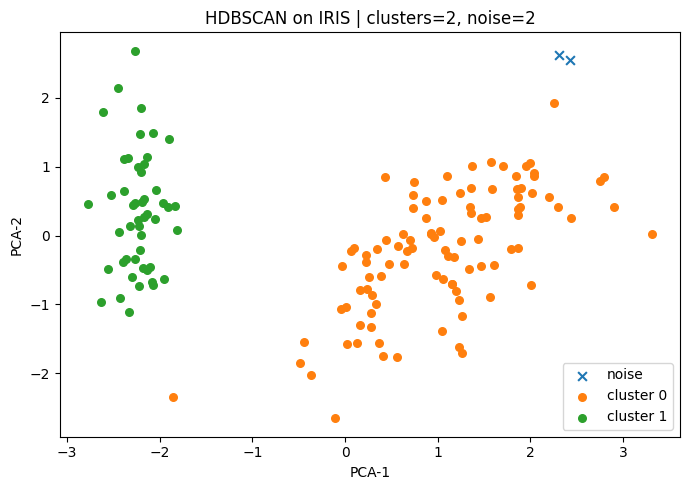

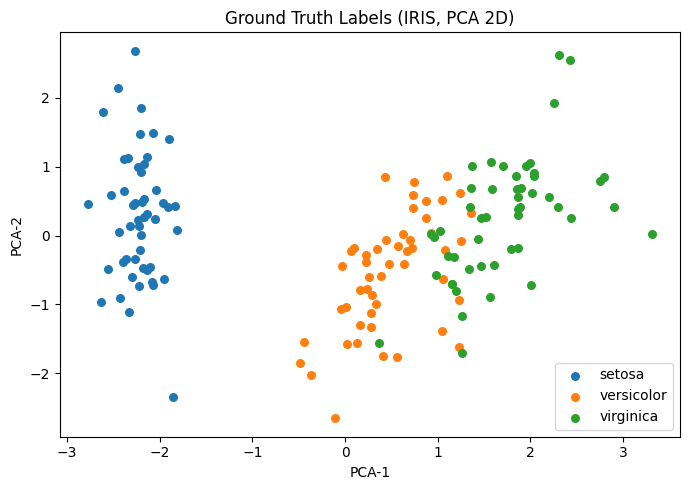

In [ ]:
# --- Setup
!pip install -q hdbscan

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import hdbscan

# --- 1) Load dataset nyata: IRIS
data = load_iris()
X = data.data                 # (150, 4)
y_true = data.target          # 3 kelas: setosa, versicolor, virginica
target_names = data.target_names

# --- 2) Standarisasi fitur (penting untuk clustering berbasis jarak)
X_scaled = StandardScaler().fit_transform(X)

# --- 3) HDBSCAN (atur hyperparameter dasar)
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=5)
labels = clusterer.fit_predict(X_scaled)    # -1 = noise
proba  = clusterer.probabilities_

# --- 4) Ringkasan hasil
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = int(np.sum(labels == -1))

print(f"Jumlah cluster (tanpa noise): {n_clusters}")
print(f"Banyaknya noise: {n_noise}")

# --- 5) Evaluasi terhadap label asli (abaikan noise agar fair)
mask_core  = labels != -1
labels_core = labels[mask_core]
y_core      = y_true[mask_core]

if len(np.unique(labels_core)) >= 2:
    ari = adjusted_rand_score(y_core, labels_core)
    nmi = normalized_mutual_info_score(y_core, labels_core)
else:
    ari, nmi = np.nan, np.nan

print(f"Adjusted Rand Index (non-noise): {ari}")
print(f"Normalized Mutual Info (non-noise): {nmi}")

# --- 6) Visualisasi PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(7,5))
# Default colormap dari matplotlib; -1 (noise) kita tandai dengan marker 'x'
for lab in sorted(set(labels)):
    idx = labels == lab
    if lab == -1:
        ax.scatter(X_pca[idx,0], X_pca[idx,1], marker='x', s=40, label='noise')
    else:
        ax.scatter(X_pca[idx,0], X_pca[idx,1], s=30, label=f'cluster {lab}')
ax.set_title(f"HDBSCAN on IRIS | clusters={n_clusters}, noise={n_noise}")
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.legend()
plt.tight_layout()
plt.show()

# --- 7) (Opsional) Visualisasi label asli untuk pembanding
fig, ax = plt.subplots(figsize=(7,5))
for c in np.unique(y_true):
    idx = y_true == c
    ax.scatter(X_pca[idx,0], X_pca[idx,1], s=30, label=target_names[c])
ax.set_title("Ground Truth Labels (IRIS, PCA 2D)")
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.legend()
plt.tight_layout()
plt.show()


Berikut penjelasan hasil yang kamu dapat:

# Ringkasan hasil

* **Dataset**: Iris (150 sampel, 4 fitur, 3 kelas asli: setosa, versicolor, virginica).
* **Algoritma**: HDBSCAN (fit pada data yang telah distandardisasi, visualisasi pada ruang **PCA 2D**).
* **Output inti**:

  * **Jumlah cluster (tanpa noise)**: **2**
  * **Banyaknya noise**: **2** sampel (label **-1**)
  * **ARI (non-noise)**: **0.548**
  * **NMI (non-noise)**: **0.694**

# Membaca plot

* **Plot 1 (HDBSCAN on IRIS | clusters=2, noise=2)**
  Terlihat dua kelompok utama + 2 titik **X** (noise) di area kanan-atas.

  * **cluster 1 (hijau, kiri)**: ini hampir pasti **setosa** di Iris, setosa sangat terpisah dari dua kelas lain.
  * **cluster 0 (oranye, kanan)**: gabungan **versicolor + virginica**; kedua kelas ini memang saling tumpang-tindih di beberapa fitur sehingga wajar tergabung oleh metode berbasis kepadatan.
* **Plot 2 (Ground Truth)**
  Menguatkan interpretasi: setosa terpisah jelas di kiri; versicolor (oranye) dan virginica (hijau) bercampur di sisi kanan. Dua titik yang diberi label noise oleh HDBSCAN tampak sebagai outlier di kanan-atas.

# Makna metrik

* **Adjusted Rand Index = 0.548** (pada sampel non-noise).
  ARI mengukur kesesuaian partisi dengan label asli setelah mengoreksi kebetulan (0=acak, 1=sempurna). Nilai ~0.55 menunjukkan **kecocokan sedang**: setosa cocok, tetapi penggabungan versicolor+virginica menurunkan skor.
* **Normalized Mutual Information = 0.694**.
  NMI mengukur informasi bersama antara klaster dan label (0–1). Nilai ~0.69 artinya **informasi label cukup tertangkap**, meskipun tidak sepenuhnya memisah 3 kelas.

# Analisis singkat: sesuai kah dengan label asli?

* **Sebagian sesuai.**
  HDBSCAN menemukan **setosa** sebagai klaster stabil terpisah (sesuai label asli), namun **menggabungkan versicolor & virginica** menjadi satu klaster karena kepadatan keduanya saling tumpang tindih pada ruang fitur (terlihat jelas di PCA).
* **Noise = 2** titik: HDBSCAN memperlakukan outlier sebagai noise; secara intuitif ini masuk akal karena dua titik berada jauh dari “pulau kepadatan” utama.

In [ ]:
!pip install -q hdbscan

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

iris = load_iris()
X, y = iris.data, iris.target
names = iris.target_names

X_scaled = StandardScaler().fit_transform(X)

clusterer = hdbscan.HDBSCAN(min_cluster_size=8, min_samples=5)
labels = clusterer.fit_predict(X_scaled)        # -1 = noise
proba  = clusterer.probabilities_

pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X_scaled)

df = pd.DataFrame({
    "sepal_length": X[:,0], "sepal_width": X[:,1],
    "petal_length": X[:,2], "petal_width": X[:,3],
    "true_id": y, "true_name": [names[i] for i in y],
    "hdb_label": labels, "probability": proba,
    "pca1": Xp[:,0], "pca2": Xp[:,1]
})
df.head(10)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,true_id,true_name,hdb_label,probability,pca1,pca2
0,5.1,3.5,1.4,0.2,0,setosa,1,1.000000,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,setosa,1,1.000000,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,setosa,1,1.000000,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,setosa,1,1.000000,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,setosa,1,1.000000,-2.389842,0.646835
5,5.4,3.9,1.7,0.4,0,setosa,1,0.796353,-2.075631,1.489178
6,4.6,3.4,1.4,0.3,0,setosa,1,0.799775,-2.444029,0.047644
7,5.0,3.4,1.5,0.2,0,setosa,1,1.000000,-2.232847,0.223148
8,4.4,2.9,1.4,0.2,0,setosa,1,0.731684,-2.334640,-1.115328
9,4.9,3.1,1.5,0.1,0,setosa,1,1.000000,-2.184328,-0.469014


In [ ]:
ct = pd.crosstab(df["true_name"], df["hdb_label"], dropna=False)
ct = ct.reindex(columns=sorted(ct.columns))   # urutkan kolom: -1, 0, 1, ...
ct


hdb_label,-1,0,1
true_name,,,
setosa,0,1,49
versicolor,0,50,0
virginica,2,48,0


In [ ]:
ambiguous = df[df["hdb_label"] != -1].nsmallest(12, "probability")
ambiguous[["true_name","hdb_label","probability","pca1","pca2","petal_length","petal_width"]]


,true_name,hdb_label,probability,pca1,pca2,petal_length,petal_width
41,setosa,0,0.316144,-1.858122,-2.337415,1.3,0.3
15,setosa,1,0.333427,-2.262215,2.686284,1.5,0.4
118,virginica,0,0.465274,3.310696,0.017781,6.9,2.3
60,versicolor,0,0.465275,-0.110196,-2.654073,3.5,1.0
106,virginica,0,0.481784,0.367018,-1.561503,4.5,1.7
109,virginica,0,0.482493,2.259777,1.921010,6.1,2.5
14,setosa,1,0.510125,-2.198741,1.860057,1.2,0.2
33,setosa,1,0.526277,-2.446177,2.150728,1.4,0.2
32,setosa,1,0.539744,-2.614948,1.793576,1.5,0.1
85,versicolor,0,0.540375,0.429139,0.845582,4.5,1.6


In [ ]:
noise_points = df[df["hdb_label"] == -1]
noise_points[["true_name","hdb_label","probability","pca1","pca2","petal_length","petal_width"]]


,true_name,hdb_label,probability,pca1,pca2,petal_length,petal_width
117,virginica,-1,0.0,2.426329,2.556661,6.7,2.2
131,virginica,-1,0.0,2.304928,2.626323,6.4,2.0
